# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Макбари Даниш Александрович БВТ2005
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
import time

inf = np.iinfo('int').max
restable = []

def read_graph(file):
    mat = []
    with open(file, 'r') as fd:
        for line in fd:
            temp = []
            for num in line.split():
                if num == 'inf':
                    temp.append(0)
                else:
                    temp.append(int(num))
            mat.append(temp)
    return nx.from_numpy_matrix(np.matrix(mat), create_using = nx.DiGraph)

def convert_adjmat(adjmat):
    ret = []
    for i in range(len(adjmat)):
        ret.append([])
        for j in range(len(adjmat)):
            ret[i].append(adjmat[i, j])
            if adjmat[i, j] == 0 and i != j:
                ret[i][j] = inf
    return ret

def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)

Начальная вершина:0
Конечная врешина:8
Красным отмечен короткий путь из 0 в 8
Длина пути 6


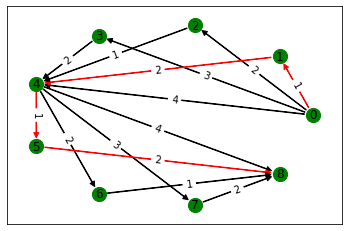

In [2]:
# Алгоритм Флойда-Уоршелла

def __floyd_warshall(adjmat):
    histmat = []
    for i in range(len(adjmat)):
        histmat.append([])
        for j in range(len(adjmat)):
            if adjmat[i][j] != 0 and adjmat[i][j] != inf:
                histmat[i].append(j)
            else:
                histmat[i].append(-1)            
    for k in range(len(adjmat)):
        for i in range(len(adjmat)):
            for j in range(len(adjmat)):
                if adjmat[i][k] != inf and adjmat[k][j] != inf and adjmat[i][j] > adjmat[i][k] + adjmat[k][j]:
                    adjmat[i][j] = adjmat[i][k] + adjmat[k][j]
                    histmat[i][j] = histmat[i][k]
    return adjmat, histmat

def floyd_warshall(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    adjmat, histmat = __floyd_warshall(adjmat)
    if histmat[start][end] == -1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    path = [start]
    while path[-1] != end:
        path.append(histmat[path[-1]][end])
    print(f"Красным отмечен короткий путь из {start} в {end}")
    print(f"Длина пути {adjmat[start][end]}")
    draw_graph(graph, path)
    
graph = read_graph('lab6_files/mat1.txt')
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
start = time.time()
floyd_warshall(graph, node1, node2)
end = time.time()
restable.append(['floyd-warshall', end - start])

Начальная вершина:0
Конечная врешина:8
Красным отмечен короткий путь из 0 в 8
Длина пути 6


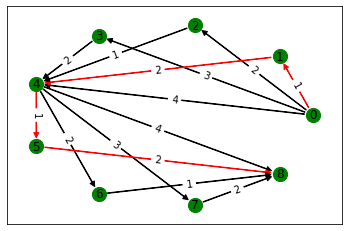

In [3]:
# Алгоритм Дейкстры

def __dijkstra(adjmat, start):
    dist = [inf for item in adjmat]
    dist[start] = 0
    vert = start
    paths = [[start] for item in adjmat]
    nextdist = dist.copy()
    for k in range(len(dist)):
        for i in range(len(dist)):
            if adjmat[vert][i] != inf and dist[vert] != inf and dist[i] > adjmat[vert][i] + dist[vert]:
                dist[i] = adjmat[vert][i] + dist[vert]
                nextdist[i] = dist[i]
                paths[i] = paths[vert].copy()
                paths[i].append(i)
        nextdist[vert] = inf
        vert = min(range(len(nextdist)), key = nextdist.__getitem__)
    return dist, paths

def dijkstra(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __dijkstra(adjmat, start)
    if len(paths[end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Красным отмечен короткий путь из {start} в {end}")
    print(f"Длина пути {dist[end]}")
    draw_graph(graph, paths[end])

graph = read_graph('lab6_files/mat1.txt')
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
start = time.time()
dijkstra(graph, node1, node2)
end = time.time()
restable.append(['dijkstra', end - start])

Начальная вершина:0
Конечная врешина:8
Красным отмечен короткий путь из 0 в 8
Длина пути 6


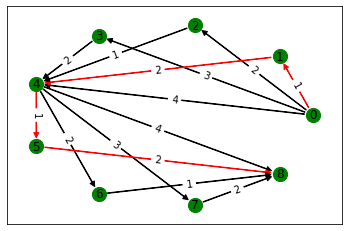

In [4]:
# Алгоритм Беллмана-Форда

def __bellman_ford(adjmat, start):
    dist = [inf for item in adjmat]
    dist[start] = 0
    paths = [[start] for item in adjmat]
    for i in range(len(adjmat)):
        for u in range(len(adjmat)):
             for v in range(len(adjmat)):
                    if dist[u] != inf and adjmat[u][v] != inf and dist[v] > dist[u] + adjmat[u][v]:
                        dist[v] = dist[u] + adjmat[u][v]
                        paths[v] = paths[u].copy()
                        paths[v].append(v)
    return dist, paths

def bellman_ford(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __bellman_ford(adjmat, start)
    if len(paths[end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Красным отмечен короткий путь из {start} в {end}")
    print(f"Длина пути {dist[end]}")
    draw_graph(graph, paths[end])

graph = read_graph('lab6_files/mat1.txt')
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
start = time.time()
bellman_ford(graph, node1, node2)
end = time.time()
restable.append(['bellman-ford', end - start])

Начальная вершина:0
Конечная врешина:8
Красным отмечен короткий путь из 0 в 8
Длина пути 6


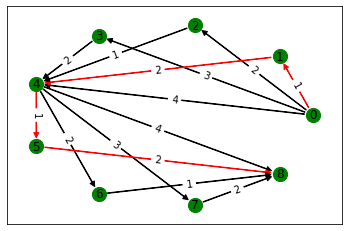

In [5]:
# Алгоритм Джонсона

def __jonson(adjmat):
    adjmatf = adjmat.copy()
    for item in adjmatf:
        item.append(inf)
    adjmatf.append([])
    for i in range(len(adjmatf)):
        adjmatf[-1].append(0)
    bell_dist, paths = __bellman_ford(adjmatf, len(adjmatf) - 1)
    for u in range(len(adjmat)):
        for v in range(len(adjmat)):
            if adjmat[u][v] != inf and bell_dist[u] != inf and bell_dist[v] != inf:
                adjmat[u][v] += bell_dist[u] - bell_dist[v]
    resdist = []
    respaths = []
    for i in range(len(adjmat)):
            dist, paths = __dijkstra(adjmat, i)
            resdist.append(dist)
            respaths.append(paths)
    for u in range(len(adjmat)):
        for v in range(len(adjmat)):
            if resdist[u][v] != inf and bell_dist[u] != inf and bell_dist[v] != inf:
                resdist[u][v] +=  bell_dist[v] - bell_dist[u]
    return resdist, respaths

def jonson(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __jonson(adjmat)
    if len(paths[start][end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Красным отмечен короткий путь из {start} в {end}")
    print(f"Длина пути {dist[start][end]}")
    draw_graph(graph, paths[start][end])

graph = read_graph('lab6_files/mat1.txt')
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
start = time.time()
jonson(graph, node1, node2)
end = time.time()
restable.append(['jonson', end - start])

Начальная вершина:0
Конечная врешина:8
Красным отмечен короткий путь из 0 в 8
Длина пути 6


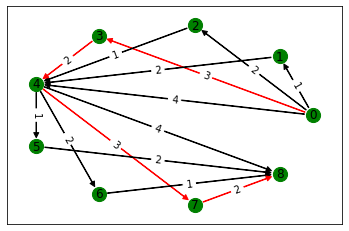

In [6]:
# Алгоритм Левита

def __levit(adjmat, start):
    dist = [inf for item in adjmat]
    dist[start] = 0
    paths = [[start] for item in adjmat]
    m0 = set()
    m1 = {'main': [start], 'urgent': []}
    m2 = set(range(len(adjmat)))
    m2.remove(start)
    while len(m1['main']) or len(m1['urgent']):
        u = None
        if len(m1['urgent']):
            u = m1['urgent'].pop(0)
        else:
            u = m1['main'].pop(0)
        for v in range(len(adjmat)):
            if dist[u] == inf or adjmat[u][v] == inf:
                continue
            if v in m2:
                m2.remove(v)
                m1['main'].append(v)
                dist[v] = min(dist[v], dist[u] + adjmat[u][v])
                paths[v] = paths[u].copy()
                paths[v].append(v)
            elif v in m1['main'] or v in m1['urgent']:
                dist[v] = min(dist[v], dist[u] + adjmat[u][v])
                paths[v] = paths[u].copy()
                paths[v].append(v)
            elif v in m0 and dist[v] > dist[u] + adjmat[u][v]:
                m0.remove(v)
                m1['urgent'].append(v)
                dist[v] = dist[u] + adjmat[u][v]
                paths[v] = paths[u].copy()
                paths[v].append(v)
        m0.add(u)
    return dist, paths

def levit(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __levit(adjmat, start)
    if len(paths[end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Красным отмечен короткий путь из {start} в {end}")
    print(f"Длина пути {dist[end]}")
    draw_graph(graph, paths[end])

graph = read_graph('lab6_files/mat1.txt')
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
start = time.time()
levit(graph, node1, node2)
end = time.time()
restable.append(['levit', end - start])

Начальная вершина:0
Конечная врешина:8
Колличество путей:5
Красным отмечен 1 короткий путь из 0 в 8
Длина пути 6


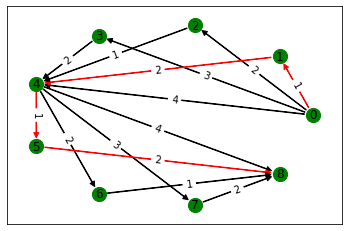

Красным отмечен 2 короткий путь из 0 в 8
Длина пути 6


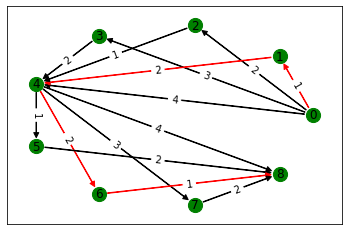

Красным отмечен 3 короткий путь из 0 в 8
Длина пути 6


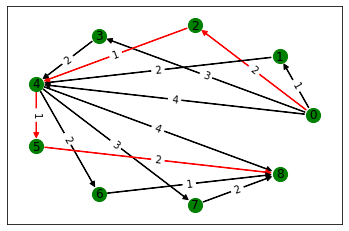

Красным отмечен 4 короткий путь из 0 в 8
Длина пути 6


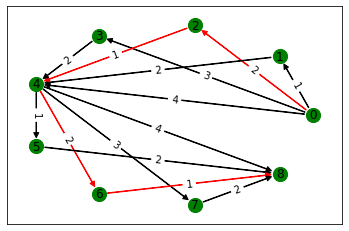

Красным отмечен 5 короткий путь из 0 в 8
Длина пути 7


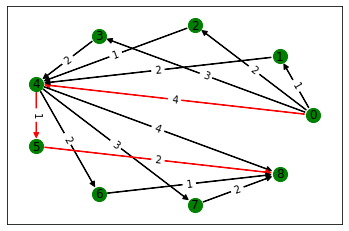

In [9]:
# Алгоритм Йена

def __yen(adjmat, start, end, K):
    candidates = set()
    dists, paths = __bellman_ford(adjmat, start)
    resultPaths = [paths[end]]
    resultDists = [dists[end]]
    if len(resultPaths[0]) == 1:
        return result

    for k in range(1, K):
        mat = copy.deepcopy(adjmat)
        for i in range(len(resultPaths[-1]) - 1):
            spurNode = resultPaths[-1][i]
            rootPath = resultPaths[-1][:i + 1]
            
            for path in resultPaths:
                if rootPath == path[:i + 1]:
                    mat[path[i]][path[i + 1]] = inf
            
            for node in rootPath:
                if node != spurNode:
                    mat[node] = [inf for j in range(len(adjmat))]

            dists, paths = __bellman_ford(mat, spurNode)
            
            spurPath = paths[end][1:]
            if len(spurPath) == 0:
                continue
            
            totalPath = rootPath
            totalPath.extend(spurPath)
            totalPath = tuple(totalPath)
            
            totalDist = 0
            for j in range(1, len(totalPath)):
                totalDist += adjmat[totalPath[j - 1]][totalPath[j]]
            
            candidates.add((totalPath, totalDist))
        
        if not len(candidates):
            break
        
        candidates_l = list(candidates)
        candidates_l.sort(key = lambda x: x[1])
        
        resultPaths.append(list(candidates_l[0][0]))
        resultDists.append(candidates_l[0][1])
        
        candidates.remove(candidates_l[0])
                    
    return resultDists, resultPaths

def yen(graph, start, end, K):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dists, paths = __yen(adjmat, start, end, K)
    
    for path, dist, i in zip(paths, dists, range(len(paths))):
        print(f"Красным отмечен {i + 1} короткий путь из {start} в {end}")
        print(f"Длина пути {dist}")
        plt.figure(i)
        draw_graph(graph, path)
        plt.show()
    

graph = read_graph('lab6_files/mat1.txt')
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
k = int(input('Колличество путей:'))
start = time.time()
yen(graph, node1, node2, k)
end = time.time()
restable.append(['yen', end - start])

### Вывод

In [10]:
restable.sort(key = lambda x: x[1])
for item, i in zip(restable, range(1, len(restable))):
    print(f'{i} место: {item[0]} {item[1]}')

1 место: jonson 0.047981977462768555
2 место: levit 0.04999661445617676
3 место: dijkstra 0.05133795738220215
4 место: bellman-ford 0.05449509620666504
5 место: floyd-warshall 0.06590104103088379
6 место: yen 0.8708205223083496
